In [3]:
import tensorflow as tf 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


In [4]:
fashion = tf.keras.datasets.fashion_mnist
(trainImage, trainLabel), (testImage, testLabel) = fashion.load_data()

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
2


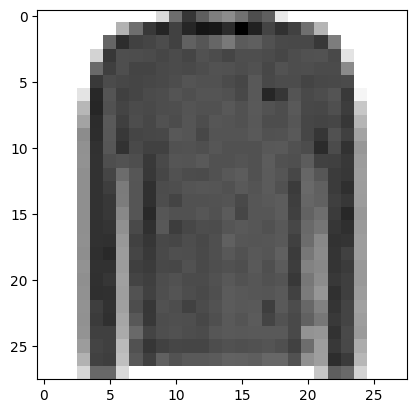

In [6]:
random = trainImage[65]
plt.imshow(random, cmap = 'binary')
print(trainImage.shape,  trainLabel.shape)
print(testImage.shape, testLabel.shape)

In [7]:
#nomalization
trainImage = trainImage /255
testImage = testImage /255
#reshape
trainImage = trainImage.reshape(60000, 28, 28, 1)
testImage = testImage.reshape(10000, 28, 28, 1)

In [8]:
print(trainImage.shape, testImage.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### we need a custom layer first

In [15]:
class myLayerClass(tf.keras.layers.Layer):
  def __init__(self, units = 32, activation= None):
    super(myLayerClass, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)

  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name ="nodesWeight", 
                         initial_value = w_init(shape=(input_shape[-1], self.units),
                                                dtype = 'float32',),
                         trainable = True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name = "nodeBias", 
                         initial_value=b_init(shape=(self.units,), 
                                              dtype = 'float32'), 
                         trainable = True)
    super().build(input_shape)

  def call(self, inputs):
    return self.activation(tf.matmul(inputs, self.w) + self.b)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = [28, 28, 1]),
    tf.keras.layers.Flatten(), 
    myLayerClass(128, activation = 'relu'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
model.compile(optimizer = 'sgd', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
print("model compiled well")

model compiled well


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 my_layer_class_1 (myLayerCl  (None, 128)              100480    
 ass)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


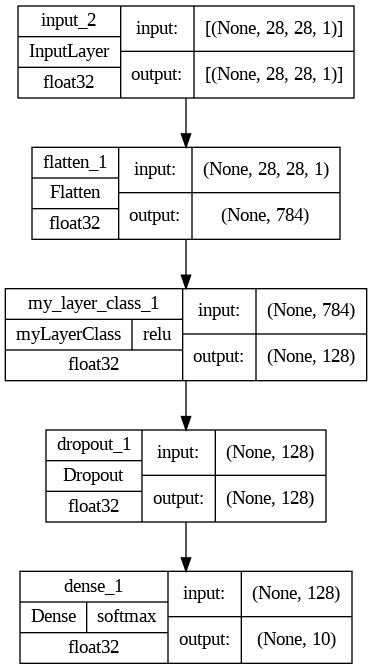

In [19]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, 
                          show_layer_activations = True)

In [21]:
model.fit(trainImage, trainLabel,batch_size = 128,  epochs = 20 
          , validation_data=(testImage, testLabel))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.1657 - accuracy: 0.6273 - val_loss: 0.8065 - val_accuracy: 0.7295
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.7733 - accuracy: 0.7440 - val_loss: 0.6790 - val_accuracy: 0.7772
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6730 - accuracy: 0.7757 - val_loss: 0.6180 - val_accuracy: 0.7942
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6239 - accuracy: 0.7911 - val_loss: 0.5814 - val_accuracy: 0.8065
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5895 - accuracy: 0.8034 - val_loss: 0.5577 - val_accuracy: 0.8116
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5645 - accuracy: 0.8105 - val_loss: 0.5393 - val_accuracy: 0.8163
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5435 - accuracy: 0.8161 - val_loss: 0.5243 - val_accuracy: 0.8201
Epoch 

# well Done!